In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
t_c = [0.5,14.0,15.0,28.0,11.0,8.0,3.0,-4.0,6.0,13.0,21.0]
t_u = [35.7,55.9,58.2,81.9,56.3,48.9,33.9,21.8,48.4,60.4,68.4]

def normalization(X): # input tensor, output normalized tensor
    X_min,X_max = X.min(),X.max()
    new_min, new_max = 0, 1
    X_n = (X-X_min)/((X_max - X_min)*(new_max - new_min)+new_min)
    return X_n

    

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_cn = normalization(t_c)
t_un = normalization(t_u)




In [2]:
def model(t_u,w2,w1,b): # forward pass, returns the value t_p
    return w2*(t_u**2)+w1*t_u+b

def loss(t_p,t_c): # loss calculation 
    squared_diffs = (t_p-t_c)**2
    return squared_diffs.mean()

weights = torch.tensor([1.0,1.0,0.0],requires_grad = True)

def training_loop(iterations,learning_rate,t_u,t_c,weights):
    for epoch in range(iterations+1):
        L = loss(model(t_u,*weights),t_c)
        L.backward()
        
        with torch.no_grad():
            weights -= learning_rate *weights.grad
            
       
        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(L)))
    plt.plot(t_u,t_c,'ro')
    plt.plot(t_u, model(t_u,*weights).detach().numpy())
    plt.title('temperature non-linear linear regression model with learning rate %d' % (learning_rate))
    plt.xlabel('Fahrenheit')
    plt.ylabel('celsius')
    plt.legend()
    return weights
    

Epoch 0, Loss 0.206668
Epoch 500, Loss 0.216073
Epoch 1000, Loss 0.203958
Epoch 1500, Loss 0.171789
Epoch 2000, Loss 0.126865
Epoch 2500, Loss 0.077982
Epoch 3000, Loss 0.035679
Epoch 3500, Loss 0.008773
Epoch 4000, Loss 0.002751
Epoch 4500, Loss 0.019313


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 5000, Loss 0.054366




Epoch 0, Loss 0.014421
Epoch 500, Loss 0.029790
Epoch 1000, Loss 0.005882
Epoch 1500, Loss 0.018495
Epoch 2000, Loss 0.027118
Epoch 2500, Loss 0.010747
Epoch 3000, Loss 0.018738
Epoch 3500, Loss 0.014762


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 4000, Loss 0.029790
Epoch 4500, Loss 0.005026
Epoch 5000, Loss 0.019820




Epoch 0, Loss 0.017779
Epoch 500, Loss 0.007261
Epoch 1000, Loss 0.010051
Epoch 1500, Loss 0.011533
Epoch 2000, Loss 0.011488
Epoch 2500, Loss 0.011360
Epoch 3000, Loss 0.005682
Epoch 3500, Loss 0.017374
Epoch 4000, Loss 0.008880
Epoch 4500, Loss 0.005057


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 5000, Loss 0.019023




Epoch 0, Loss 0.018954
Epoch 500, Loss 0.007356
Epoch 1000, Loss 0.004855
Epoch 1500, Loss 0.016898
Epoch 2000, Loss 0.010608
Epoch 2500, Loss 0.006803
Epoch 3000, Loss 0.012241
Epoch 3500, Loss 0.010167
Epoch 4000, Loss 0.012182
Epoch 4500, Loss 0.010296


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch 5000, Loss 0.005766






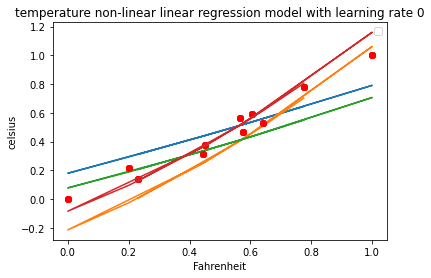

In [3]:
w = training_loop(5000,0.1,t_un,t_cn,weights)

print('\n\n\n')
w = training_loop(5000,0.01,t_un,t_cn,weights)

print('\n\n\n')
w = training_loop(5000,0.001,t_un,t_cn,weights)

print('\n\n\n')
w = training_loop(5000,0.0001,t_un,t_cn,weights)

print('\n\n\n')

In [4]:
#best of slides = 2.927646, best of non-linear = 0.0001 (bottom)
#problem 2 ALMOST DONE, BUT NEEDS TEST/VALIDATION SPLIT
df = pd.read_csv("Housing.csv")
xnum = ['area','bedrooms','bathrooms','stories','parking']
y = df['price'].values #t_c
x = df[xnum]
x0 = np.ones((len(y),1))

X= np.hstack((x,x0)) #t_u
X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = normalization(X)
y = normalization(y)

weights = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0],requires_grad = True)

torch.Size([545, 6])
torch.Size([545])
Epoch 0, Loss 0.432234
Epoch 500, Loss 0.098287
Epoch 1000, Loss 0.222024
Epoch 1500, Loss 0.373391
Epoch 2000, Loss 0.026252
Epoch 2500, Loss 0.387229
Epoch 3000, Loss 0.201496
Epoch 3500, Loss 0.114865
Epoch 4000, Loss 0.428262
Epoch 4500, Loss 0.052314
Epoch 5000, Loss 0.294105
Epoch 0, Loss 0.242626
Epoch 500, Loss 0.051806
Epoch 1000, Loss 0.227997
Epoch 1500, Loss 0.068350
Epoch 2000, Loss 0.209968
Epoch 2500, Loss 0.087543
Epoch 3000, Loss 0.189621
Epoch 3500, Loss 0.109097
Epoch 4000, Loss 0.167093
Epoch 4500, Loss 0.132110
Epoch 5000, Loss 0.143969
Epoch 0, Loss 0.134363
Epoch 500, Loss 0.117212
Epoch 1000, Loss 0.095642
Epoch 1500, Loss 0.072801
Epoch 2000, Loss 0.051988
Epoch 2500, Loss 0.036134
Epoch 3000, Loss 0.027407
Epoch 3500, Loss 0.026999
Epoch 4000, Loss 0.035006
Epoch 4500, Loss 0.050373
Epoch 5000, Loss 0.070957
Epoch 0, Loss 0.072483
Epoch 500, Loss 0.026502
Epoch 1000, Loss 0.064116
Epoch 1500, Loss 0.066421
Epoch 2000, Los

tensor([0.1376, 0.1376, 0.1376, 0.1376, 0.1376, 0.2232], requires_grad=True)

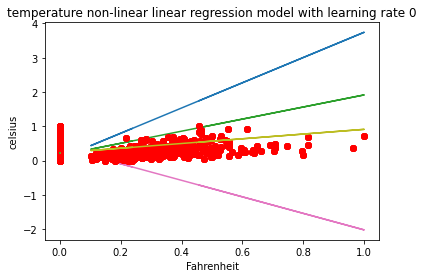

In [5]:
def model_p2(t_u,w5,w4,w3,w2,w1,b): # forward pass, returns the value t_p
    return w5*t_u+w4*t_u+w3*t_u+w2*t_u+w1*t_u+b

def training_loop_p2(iterations,learning_rate,t_u,t_c,weights):
    for epoch in range(iterations+1):
        L = loss(model_p2(torch.transpose(t_u,0,1),*weights),t_c)
        L.backward()
        
        with torch.no_grad():
            weights -= learning_rate *weights.grad
            
       
        if epoch % 500 ==0:
            print('Epoch %d, Loss %f' % (epoch,float(L)))
    plt.plot(t_u,t_c,'ro')
    plt.plot(t_u, model_p2(t_u,*weights).detach().numpy())
    plt.title('temperature non-linear linear regression model with learning rate %d' % (float(learning_rate)))
    plt.xlabel('Fahrenheit')
    plt.ylabel('celsius')
    return weights


print(model_p2(X,*weights).size())
print(y.size())
model_p2(X,*weights)
training_loop_p2(5000,0.1,X,y,weights)
training_loop_p2(5000,0.01,X,y,weights)
training_loop_p2(5000,0.001,X,y,weights)
training_loop_p2(5000,0.0001,X,y,weights)

In [6]:
#best is 0.001, 